In [49]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import skew, kurtosis
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression


In [3]:
df= pd.read_csv("used_cars_data.csv")
df.head(5)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
df.columns

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

**1. Data cleaning**

In [5]:
# Remove columns: ‘S.No’ and ‘New_Price’
df = df.drop(['S.No.','New_Price' ], axis=1)

In [6]:
df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

In [7]:
# Creating ‘Car_Age’ feature which is defined as the difference between the current year and the year the car was built
df['Car_Age']= datetime.now().year - df['Year']
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,14
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,9
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,13
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,12
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,11


In [8]:
df[df['Mileage'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.00,8
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,12.75,13


In [9]:
df.loc[df['Name']=='Mahindra E Verito D4','Mileage']='95.04755 kmpl'

In [10]:
df.loc[df['Name']=='Toyota Prius 2009-2016 Z4', 'Mileage']='23.91 kmpl'

In [11]:
df[df['Fuel_Type']=='Electric']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,95.04755 kmpl,72 CC,41 bhp,5.0,13.00,8
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,23.91 kmpl,1798 CC,73 bhp,5.0,12.75,13


1. **Mahindra E Verito D4-** The range of the car is 140km, battery capacity is 18.55 kWh, the average electricity rate of India is 8 rupee/kWh, and the rate of petrol is 100.75 rs/L. The relevant mileage of the car at the cost of the petrol is 95.04755 kmpl.
https://www.carwale.com/toyota-cars/prius-2009-2016/mileage/

1kwh =8 rupees
18.55 kWh= 18.55*8 = 148.4 rupees
148.4 Rs=140km
1rs= 0.9434km
petrol= 100.75*0.9434= 95.04755

2. **Toyota Prius 2009-2016 Z4-** As this car is hybrid, I couldn't find the range and the battery capacity of the car. The approximate mileage is noted to be 23.91 kmpl from "carwale" site.
https://www.carwale.com/toyota-cars/prius-2009-2016/mileage/


**2. Transformation**

In [12]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,14
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,9
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,13
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,12
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,11


In [13]:
df['Fuel_Type'].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [14]:
df[df['Fuel_Type']=='Electric']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,95.04755 kmpl,72 CC,41 bhp,5.0,13.00,8
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,23.91 kmpl,1798 CC,73 bhp,5.0,12.75,13


In [15]:
df[df['Fuel_Type']=='LPG']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,2.35,12
936,Maruti Wagon R LXI LPG BSIV,Hyderabad,2012,72000,LPG,Manual,First,26.2 km/kg,998 CC,58.2 bhp,5.0,2.85,12
987,Maruti Wagon R LXI DUO BSIII,Mumbai,2008,64226,LPG,Manual,First,17.3 km/kg,1061 CC,57.5 bhp,5.0,1.45,16
2278,Hyundai Santro Xing GLS LPG,Pune,2010,55000,LPG,Manual,Second,13.45 km/kg,1086 CC,62.1 bhp,5.0,1.65,14
2385,Hyundai Santro Xing GLS LPG,Hyderabad,2011,17000,LPG,Manual,First,13.45 km/kg,1086 CC,62.1 bhp,5.0,3.10,13
2436,Hyundai i10 Magna LPG,Jaipur,2012,53000,LPG,Manual,Second,19.2 km/kg,1086 CC,68.05 bhp,5.0,2.85,12
2941,Hyundai Santro Xing GL Plus LPG,Hyderabad,2014,56000,LPG,Manual,First,13.45 km/kg,1086 CC,62.1 bhp,5.0,3.20,10
3595,Maruti Wagon R LX DUO BSIII,Hyderabad,2007,65047,LPG,Manual,First,17.3 km/kg,1061 CC,57.5 bhp,5.0,1.95,17
5506,Maruti Wagon R Duo LX BSIII,Hyderabad,2012,72389,LPG,Manual,First,26.2 km/kg,998 CC,58.2 bhp,5.0,3.20,12
5997,Maruti Wagon R Duo Lxi,Jaipur,2010,70000,LPG,Manual,First,26.2 km/kg,998 CC,58.2 bhp,5.0,2.27,14


In [16]:
df[df['Fuel_Type']=='CNG']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,14
127,Maruti Wagon R LXI CNG,Pune,2013,89900,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,3.25,11
328,Maruti Zen Estilo LXI Green (CNG),Pune,2008,42496,CNG,Manual,First,26.3 km/kg,998 CC,67.1 bhp,5.0,1.40,16
440,Maruti Eeco 5 STR With AC Plus HTR CNG,Kochi,2017,31841,CNG,Manual,First,15.1 km/kg,1196 CC,73 bhp,5.0,4.70,7
839,Maruti Alto Green LXi (CNG),Delhi,2012,65537,CNG,Manual,First,26.83 km/kg,796 CC,38.4 bhp,5.0,2.10,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,Hyundai Santro Xing GLS CNG,Bangalore,2011,43985,CNG,Manual,First,11.88 km/kg,1086 CC,62.1 bhp,5.0,NaN,13
6538,Maruti Alto K10 LXI CNG,Kochi,2015,47490,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN,9
6788,Maruti Alto K10 LXI CNG Optional,Delhi,2017,33000,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN,7
6926,Maruti Eeco 5 STR With AC Plus HTR CNG,Mumbai,2017,15500,CNG,Manual,First,15.1 km/kg,1196 CC,73 bhp,5.0,NaN,7


In [17]:
df[df['Fuel_Type']=='Diesel']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,9
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,12
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,11
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,3.50,11
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,17.50,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7241,BMW 5 Series 525d Sedan,Delhi,2012,80000,Diesel,Automatic,First,16.73 kmpl,2993 CC,218 bhp,5.0,NaN,12
7243,Renault Duster 85PS Diesel RxL,Chennai,2015,70000,Diesel,Manual,First,19.87 kmpl,1461 CC,83.8 bhp,5.0,NaN,9
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,13
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,12


In [18]:
df[df['Fuel_Type']=='Petrol']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,13
10,Maruti Ciaz Zeta,Kochi,2018,25692,Petrol,Manual,First,21.56 kmpl,1462 CC,103.25 bhp,5.0,9.95,6
11,Honda City 1.5 V AT Sunroof,Kolkata,2012,60000,Petrol,Automatic,First,16.8 kmpl,1497 CC,116.3 bhp,5.0,4.49,12
22,Audi A6 2011-2015 35 TFSI Technology,Mumbai,2015,55985,Petrol,Automatic,First,13.53 kmpl,1984 CC,177.01 bhp,5.0,23.50,9
23,Hyundai i20 1.2 Magna,Kolkata,2010,45807,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0,1.87,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7245,Honda Amaze S i-Vtech,Kochi,2015,44776,Petrol,Manual,First,18.0 kmpl,1198 CC,86.7 bhp,5.0,NaN,9
7246,Hyundai Grand i10 AT Asta,Coimbatore,2016,18242,Petrol,Automatic,First,18.9 kmpl,1197 CC,82 bhp,5.0,NaN,8
7247,Hyundai EON D Lite Plus,Coimbatore,2015,21190,Petrol,Manual,First,21.1 kmpl,814 CC,55.2 bhp,5.0,NaN,9
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,9


In [19]:
# convert mileage units to a uniform unit "kmpl".
def convert_mileage(x):
  mileage_value= float(x['Mileage'].split()[0])

  if x['Fuel_Type'] == 'CNG':
    return (mileage_value/ 80) * 103.44
  elif x['Fuel_Type'] == 'LPG':
    return (mileage_value/ 89) * 103.44
  else:
    return mileage_value

df['Mileage']=df.apply(convert_mileage, axis=1)

In [20]:
# Convert 'Engine'and 'Power' column to string and then extract the numeric part
df['Engine']= pd.to_numeric(df['Engine'].astype(str).str.split().str[0],errors='coerce')

df['Power']= pd.to_numeric(df['Power'].astype(str).str.split().str[0], errors='coerce')

1. Mileage-> There are 5 types ['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'] of fuel in the dataset with different mileage unit. Since, the majority unit of mileage is "KMPL", so we are going to convert all the values to KMPL.
First, we convert values into string and take just the 0th index value and convert it into numeric value.

CNG-> I have calculated the cost of cng used per KM and then km ridden per liter relating it with the cost of petrol.

(km/kg mileage in cng / rs/kg cost of cng) * cost of petrol rs/l

where: rs/kg cost of cng=80

cost of petrol rs/l= 103.44

LPG- same has been done for LPG as well

(km/kg mileage in lpg/ rs/kg cost of lpg) *cost of petrol rs/l

where: rs/kg cost of lpg= 89


2. Engine and Power-> We extracted numerical values from the values and converted non-numeric entries (null, NaN, etc.) into NaN using errors=’coerce’.This guarantees the column is filled with neat numbers only, with all erroneous values defaulted to NaN.




**3. Outlier detection and box-plot**

Please check whether the data is in normal distribution or non-normal distribution for the following numerical
columns: ‘Car_Age’, ‘Kilometers_Driven’, ‘Mileage’, ‘Engine’, ‘Power’, ‘Seats’, ‘Price’

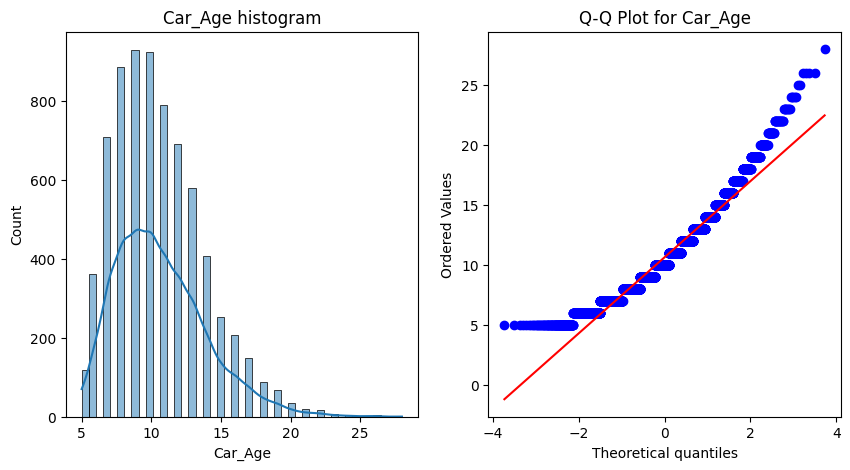

<Figure size 640x480 with 0 Axes>

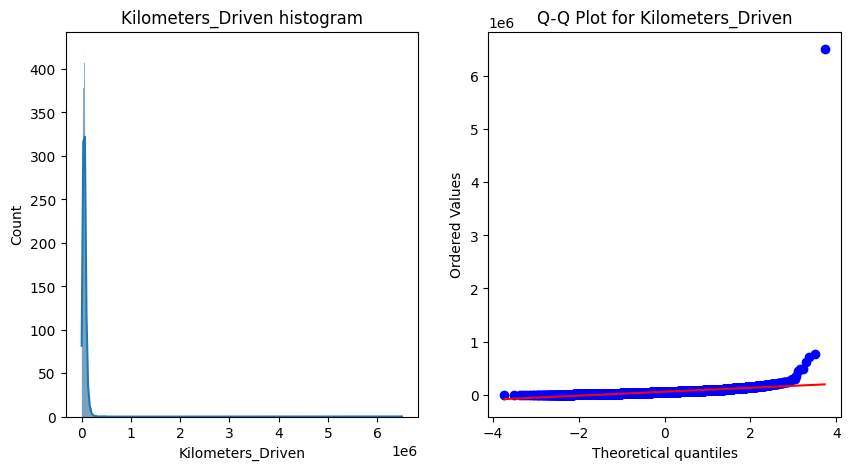

<Figure size 640x480 with 0 Axes>

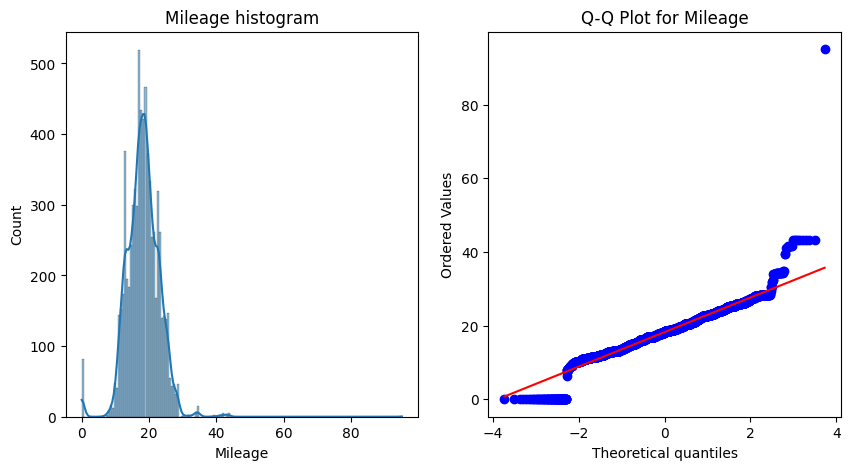

<Figure size 640x480 with 0 Axes>

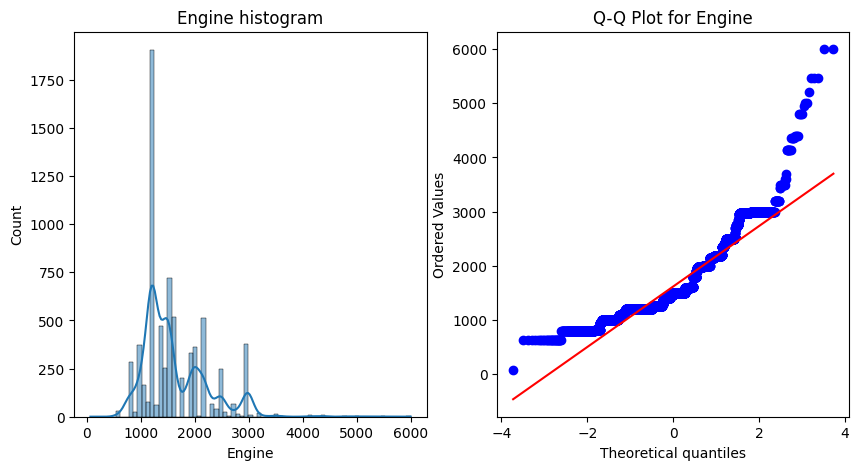

<Figure size 640x480 with 0 Axes>

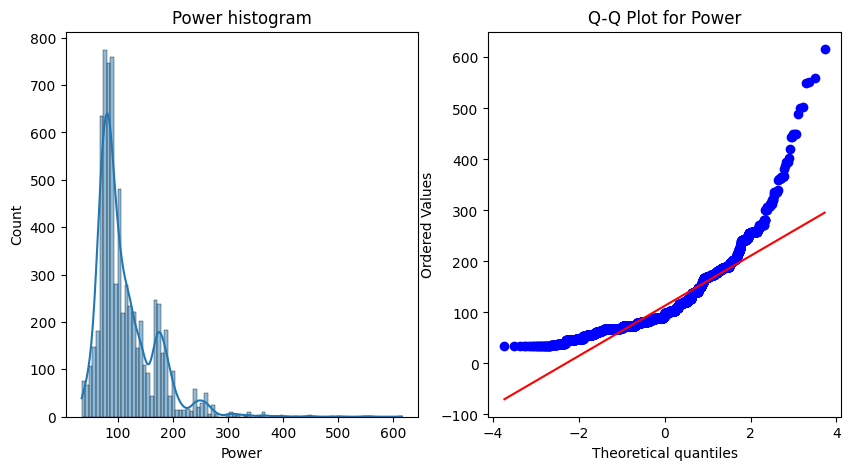

<Figure size 640x480 with 0 Axes>

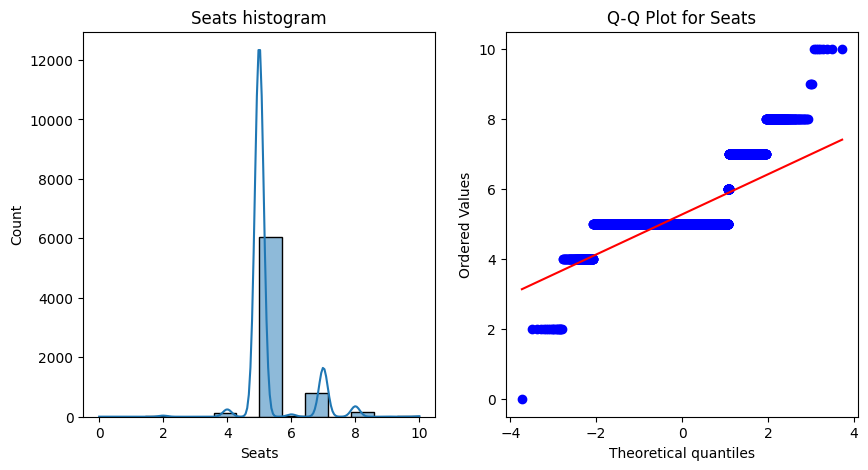

<Figure size 640x480 with 0 Axes>

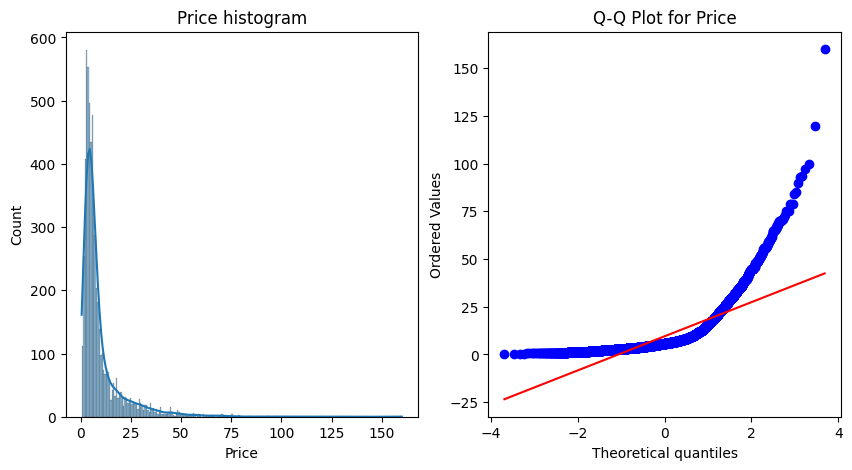

<Figure size 640x480 with 0 Axes>

In [21]:
def plot_distribution(column):
  plt.figure(figsize=(10,5))

  # Histogram
  plt.subplot(1,2,1)
  sns.histplot(df[column].dropna(),kde=True)
  plt.title(f"{column} histogram")

  # Q-Q plot
  plt.subplot(1,2,2)
  stats.probplot(df[column].dropna(),dist='norm',plot=plt)
  plt.title(f"Q-Q Plot for {column}")
  plt.show()

  plt.tight_layout()
  plt.show()


columns_to_plot=['Car_Age', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']

for col in columns_to_plot:
  plot_distribution(col)

In [22]:
# Function to perform Shapiro-Wilk test
def shapiro_test(column):
    stat, p = shapiro(df[column].dropna())
    print(f'Shapiro-Wilk test for {column}: Statistics={stat}, p={p}')
    if p > 0.05:
        print(f'{column} : normally distributed\n')
    else:
        print(f'{column} : Not normally distributed\n')

# Check normal distribution for each numerical column
for col in columns_to_plot:
    shapiro_test(col)

Shapiro-Wilk test for Car_Age: Statistics=0.9507486821938134, p=5.781548453736182e-44
Car_Age : Not normally distributed

Shapiro-Wilk test for Kilometers_Driven: Statistics=0.19456631009943592, p=1.04930962470592e-100
Kilometers_Driven : Not normally distributed

Shapiro-Wilk test for Mileage: Statistics=0.9436069415304602, p=3.638349419682404e-46
Mileage : Not normally distributed

Shapiro-Wilk test for Engine: Statistics=0.8797719301033764, p=2.251156385551449e-59
Engine : Not normally distributed

Shapiro-Wilk test for Power: Statistics=0.8419137509737625, p=3.0373159343940697e-64
Power : Not normally distributed

Shapiro-Wilk test for Seats: Statistics=0.4984490712583527, p=3.160993759732639e-89
Seats : Not normally distributed

Shapiro-Wilk test for Price: Statistics=0.6406859757274896, p=1.8804936208528862e-77
Price : Not normally distributed



/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7253.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7207.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7078.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7200.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stat

In [23]:
def calculate_skewness_kurtosis(column):
    skewness = skew(df[column].dropna())
    kurt = kurtosis(df[column].dropna())
    return skewness, kurt


for col in columns_to_plot:
    skewness, kurt = calculate_skewness_kurtosis(col)
    print(f'{col}: Skewness = {skewness:.3f}, Kurtosis = {kurt:.3f}')

Car_Age: Skewness = 0.840, Kurtosis = 0.909
Kilometers_Driven: Skewness = 61.570, Kurtosis = 4671.511
Mileage: Skewness = 0.502, Kurtosis = 11.373
Engine: Skewness = 1.412, Kurtosis = 3.174
Power: Skewness = 1.961, Kurtosis = 7.124
Seats: Skewness = 1.902, Kurtosis = 4.699
Price: Skewness = 3.334, Kurtosis = 17.077


**Histogram** and Q-Q plot is plotted to find the distribution of the data and Shapiro test is used to determine if the data is normally distributed or not.

p>0.05, data is normally distributed (accept null hypothesis)

p<0.05, data is not normally distributed (reject null hypothesis)

**Car_Age**-

From the histogram graph, it is clearly seen that the dataset is Right skewed and Q-Q plot does not fall close to diagonal line. To make sure, I did Shapiro test, calculated skew and kurtosis and from the values it seems that the data is not nornally distributed.

Shapiro-Wilk test (p<0.05)

Skewness > 0 - right skewed

Kurtosis <3 - lighter tails and flatter peak


**Kilometers_Driven** Not normally distributed

**Mileage** Not normally distributed

**Engine** Not normally distributed

**Power** Not normally distributed

**Seats** Not normally distributed

**Price** Not normally distributed



Please detect outliers based on the data distribution type. For outlier detection, please calculate step by step.
Please count(print) how many outliers for each column.

In [24]:
def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # find outliers
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return len(outliers), outliers


for col in columns_to_plot:
    num_outliers, outlier_values = detect_outliers_iqr(df[col])
    print(f"{col}: Number of outliers = {num_outliers}")

Car_Age: Number of outliers = 58
Kilometers_Driven: Number of outliers = 258
Mileage: Number of outliers = 130
Engine: Number of outliers = 65
Power: Number of outliers = 273
Seats: Number of outliers = 1153
Price: Number of outliers = 718


Since, all the required fields are not normally distributes, we use IRQ to detech outliers.




Please draw box-plot for the columns. Please draw box-plot together if the scales of the columns are in similar
range. Otherwise, please draw box-plot separately

Columns in similar scales:
['Car_Age', 'Mileage']
['Mileage', 'Power']
['Power', 'Seats']
['Seats', 'Price']

Columns in different scales:
['Engine', 'Kilometers_Driven']


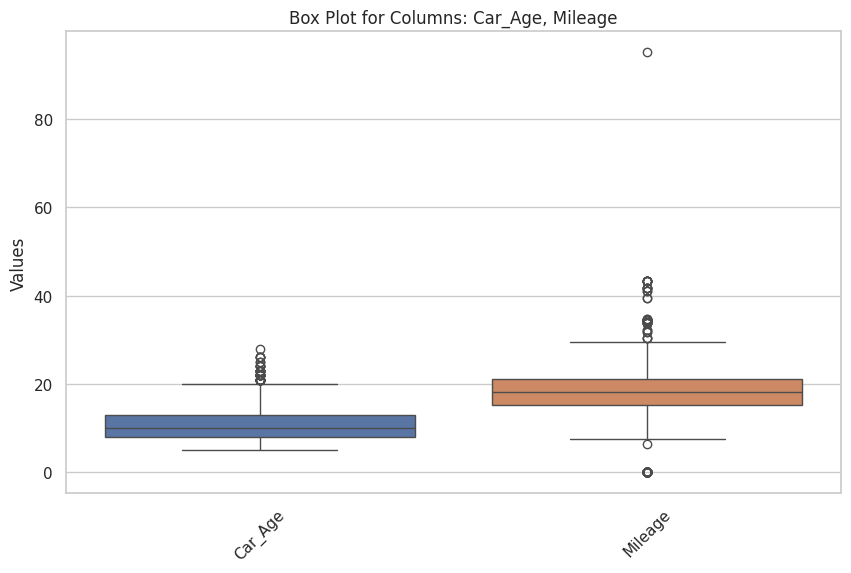

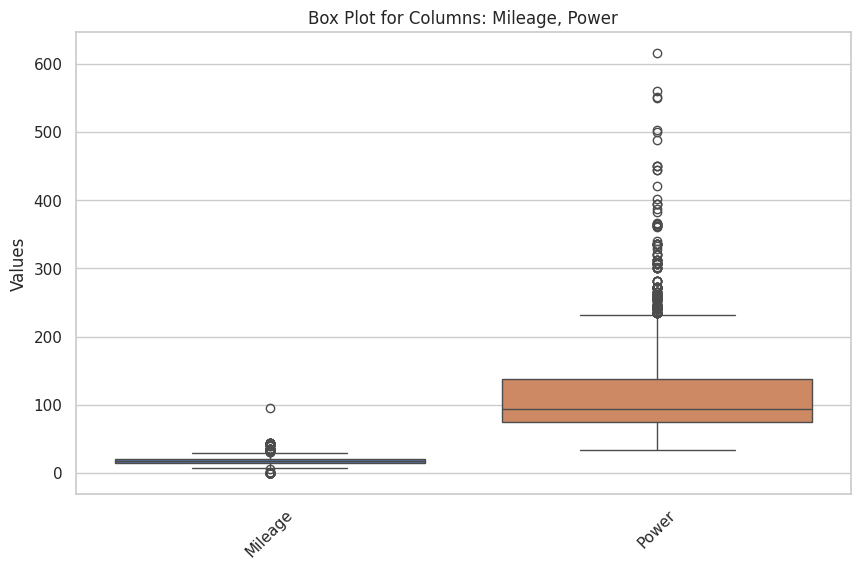

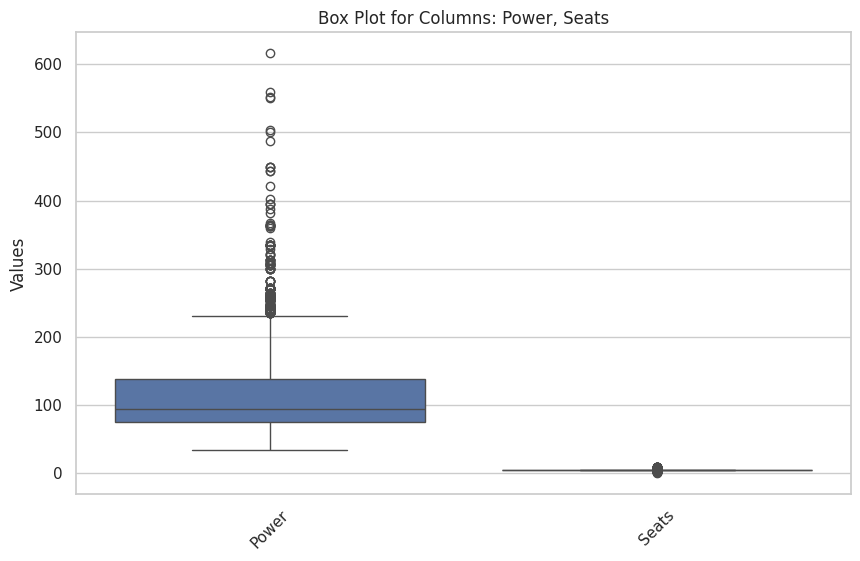

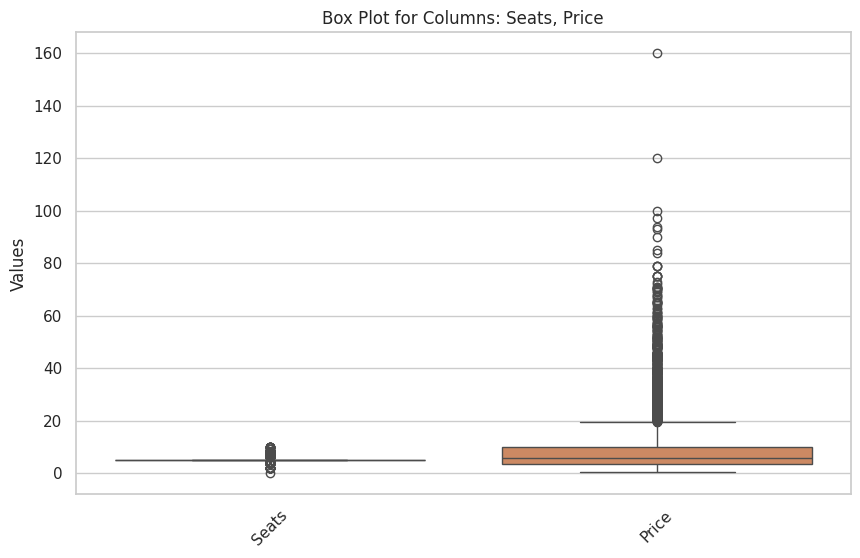

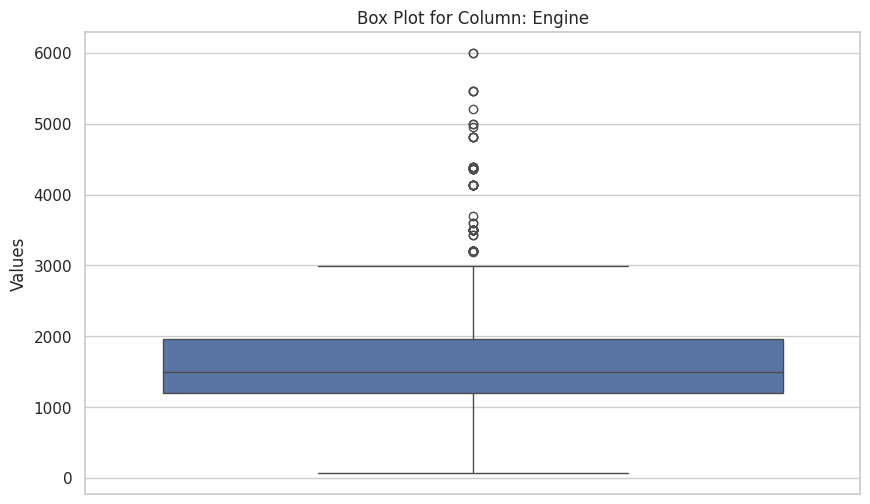

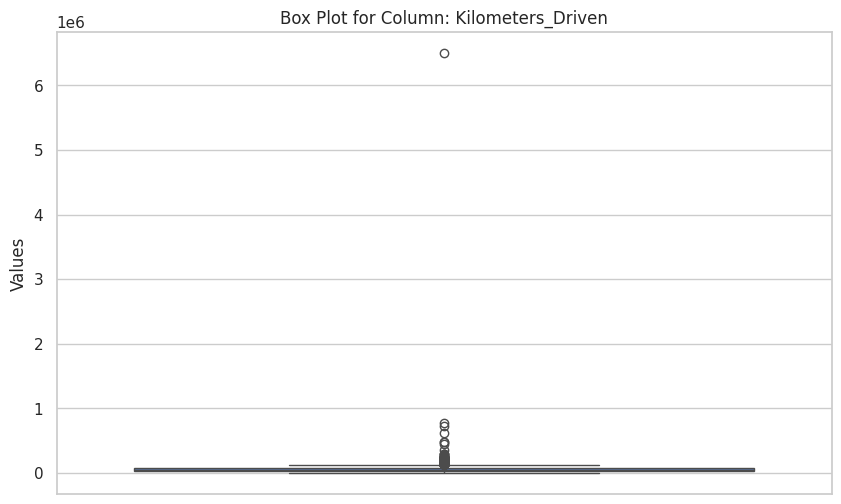

In [25]:
# Minimum and maximum values for each column
min_values = df[columns_to_plot].min()
max_values = df[columns_to_plot].max()

# Range for each column
ranges = max_values - min_values

# Similar range columns
similar_scale_columns = {}
threshold = 1000

# Group similar scale columns
for col1 in columns_to_plot:
    for col2 in columns_to_plot:
        if col1 != col2:
            if col1 not in similar_scale_columns and col2 not in similar_scale_columns:
                if abs(ranges[col1] - ranges[col2]) <= threshold:
                    similar_scale_columns.setdefault(col1, []).append(col2)

# Convert the similar_scale_columns dictionary to a list of groups
similar_scale_groups = []
for col, similar_cols in similar_scale_columns.items():
    similar_scale_groups.append([col] + similar_cols)

# Different scale columns
used_columns = set([col for group in similar_scale_groups for col in group])
different_scale_columns = list(set(columns_to_plot) - used_columns)

# Output similar scale groups and different scale columns
print("Columns in similar scales:")
for group in similar_scale_groups:
    print(group)

print("\nColumns in different scales:")
print(different_scale_columns)


# Box Plots
sns.set(style="whitegrid")

# Plot box plots for similar scale groups
for group in similar_scale_groups:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df[group])
    plt.title(f'Box Plot for Columns: {", ".join(group)}')
    plt.ylabel('Values')
    plt.xticks(rotation=45)
    plt.show()

# Plot box plots for different scale columns
for col in different_scale_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot for Column: {col}')
    plt.ylabel('Values')
    plt.show()



Please draw box-plot for ‘Mileage’ with ‘Fuel_Type

<ipython-input-26-301857e717ec>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fuel_Type', y='Mileage', data=df, palette='Set2')


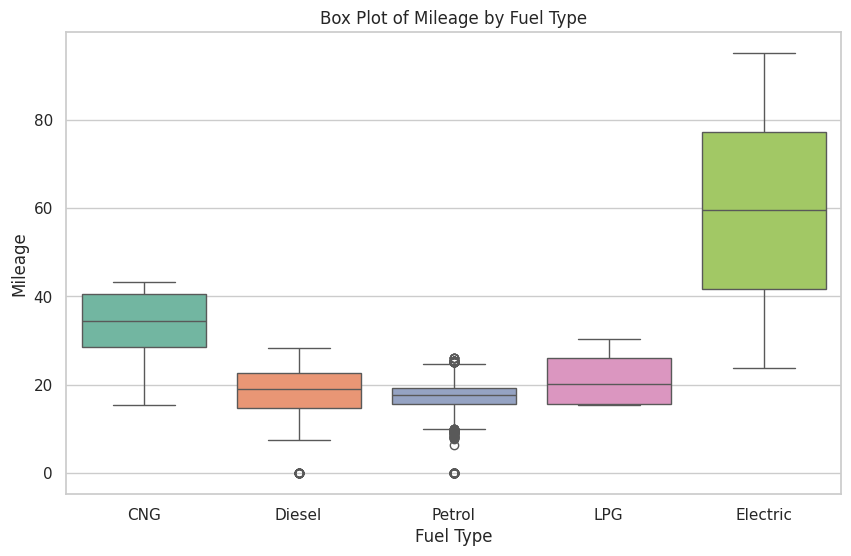

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel_Type', y='Mileage', data=df, palette='Set2')
plt.title('Box Plot of Mileage by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Mileage')
plt.show()


The box plot indicates that electric cars typically have higher mileage as opposed to other fuel types, though the variation is narrower than other fuel types. Diesel cars show the widest variance in terms of the range of mileage though there are a few exceptions. Petrol and LPG cars have close enough ranges that their distributions are somewhat alike.


**4. Pearson correlation coefficient and scatter plot**

In [27]:
# Remove outliers using IQR method

def remove_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data >= lower_bound) & (data <= upper_bound)]

cleaned_df = df.copy()

for column in columns_to_plot:
    cleaned_df[column] = remove_outliers(df[column])


In [28]:
cleaned_df.isna().sum()


,0
Name,0
Location,0
Year,0
Kilometers_Driven,258
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,130
Engine,111
Power,448


In [29]:
# Calculate Pearson correlation coefficient
def pearson_correlation(x, y):
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    covariance = np.mean((x - mean_x) * (y - mean_y))
    std_x = np.std(x)
    std_y = np.std(y)
    return covariance / (std_x * std_y)

# Pearson correlation coefficient for each pair of columns
correlation_results = {}
for i in range(len(columns_to_plot)):
    for j in range(i + 1, len(columns_to_plot)):
        col1 = columns_to_plot[i]
        col2 = columns_to_plot[j]
        correlation = pearson_correlation(cleaned_df[col1], cleaned_df[col2])
        correlation_results[(col1, col2)] = correlation

# Correlation coefficients
for pair, correlation in correlation_results.items():
    print(f'Pearson correlation coefficient between {pair[0]} and {pair[1]}: {correlation:.3f}')

Pearson correlation coefficient between Car_Age and Kilometers_Driven: 0.498
Pearson correlation coefficient between Car_Age and Mileage: -0.300
Pearson correlation coefficient between Car_Age and Engine: 0.053
Pearson correlation coefficient between Car_Age and Power: -0.019
Pearson correlation coefficient between Car_Age and Seats: nan
Pearson correlation coefficient between Car_Age and Price: -0.351
Pearson correlation coefficient between Kilometers_Driven and Mileage: -0.135
Pearson correlation coefficient between Kilometers_Driven and Engine: 0.171
Pearson correlation coefficient between Kilometers_Driven and Power: 0.065
Pearson correlation coefficient between Kilometers_Driven and Seats: nan
Pearson correlation coefficient between Kilometers_Driven and Price: -0.071
Pearson correlation coefficient between Mileage and Engine: -0.629
Pearson correlation coefficient between Mileage and Power: -0.522
Pearson correlation coefficient between Mileage and Seats: nan
Pearson correlation 

<ipython-input-29-64eeefa77923>:8: RuntimeWarning: invalid value encountered in scalar divide
  return covariance / (std_x * std_y)



The Pearson correlation coefficient is utilized to quantify the degree of linear relation between two continuous variables and it is subdivided into three categories as follows.

Positive Correlation (0 < r ≤ 1): for any inherent differences amongst the variables whenever one variable increases the other variable tends to also increase.

Negative Correlation (-1 ≤ r < 0): there is some control on one of the variables by the other variable, however, as one variable grows, that variable falls.

No Correlation (r = 0): The functional relationship is defined, but not necessarily linear.

As per the result, there is a strong correlation between Engine and Power (0.727).




Please draw scatterplots between two columns for the following columns: ‘Car_Age’, ‘Kilometers_Driven’,
‘Mileage’, ‘Engine’, ‘Power’, ‘Seats’, ‘Price’. Please include the coefficient value inside of the figures

<Figure size 1000x800 with 0 Axes>

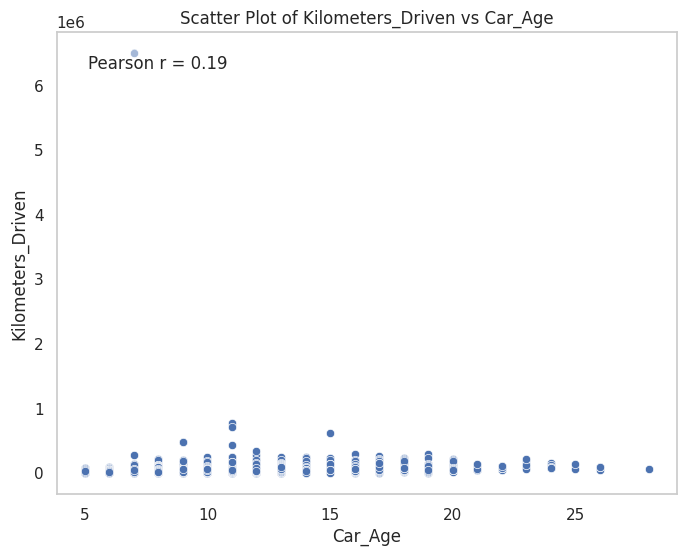

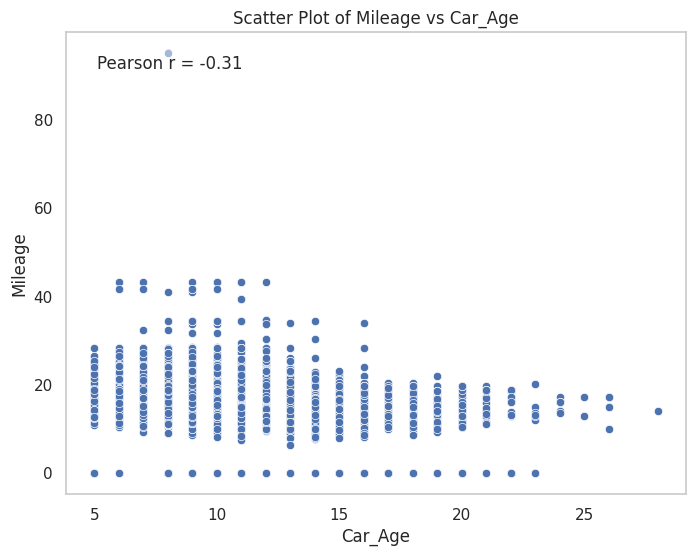

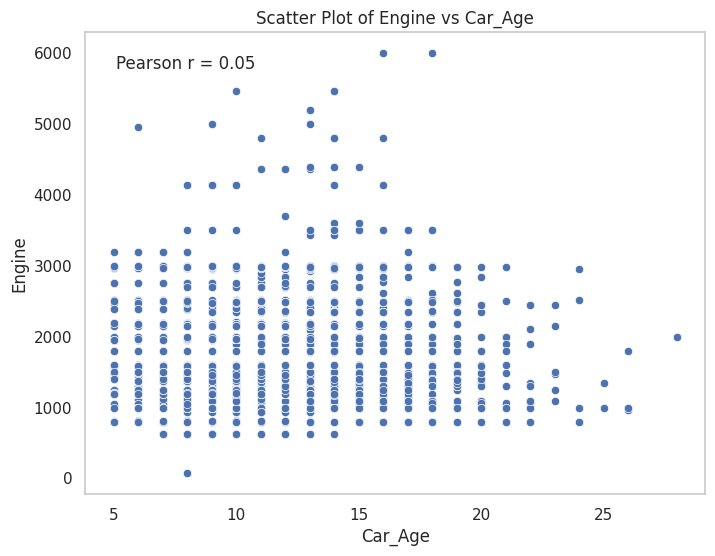

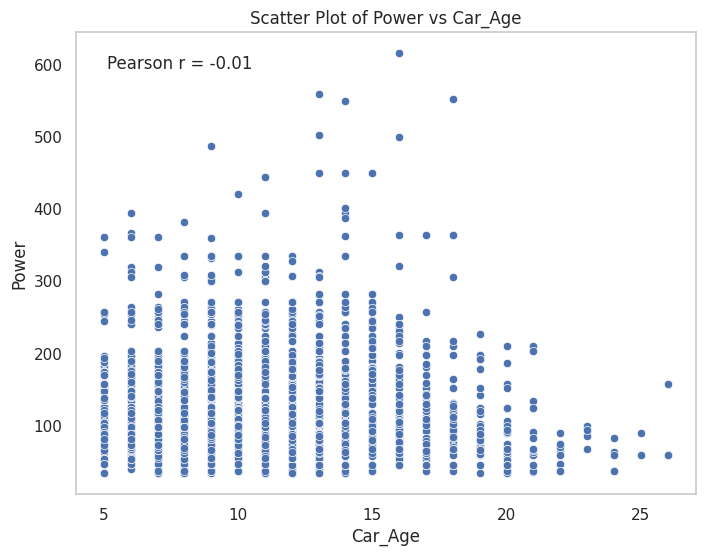

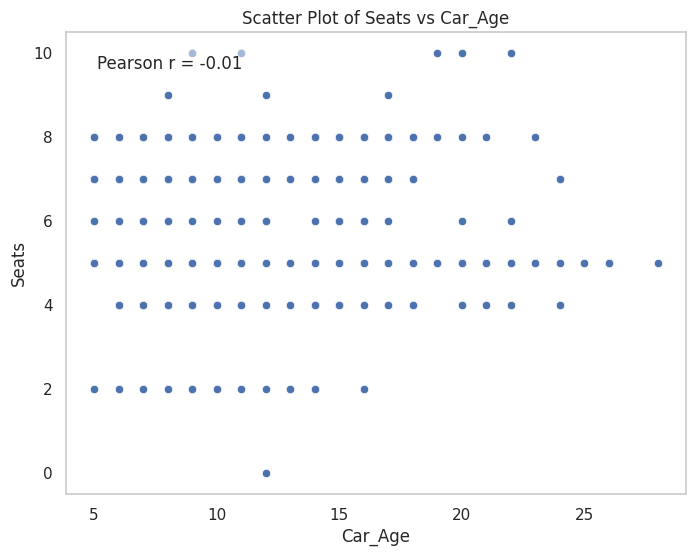

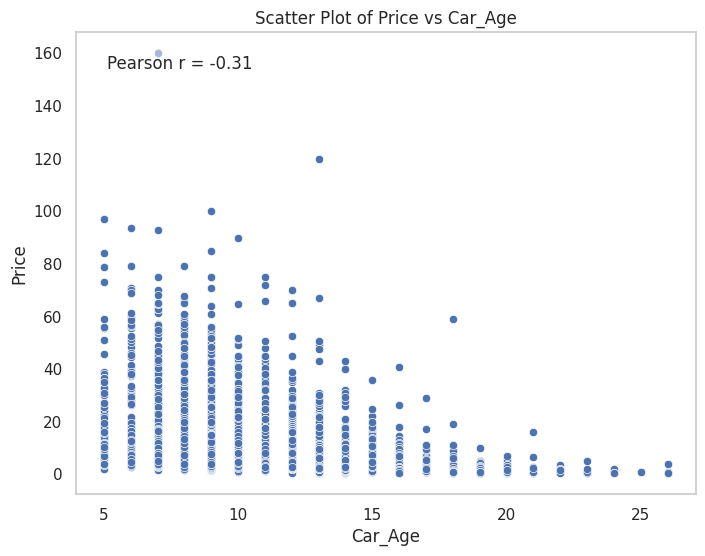

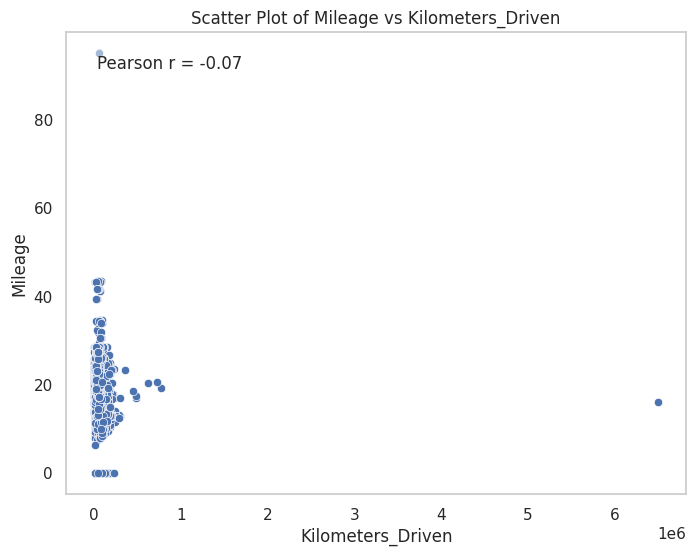

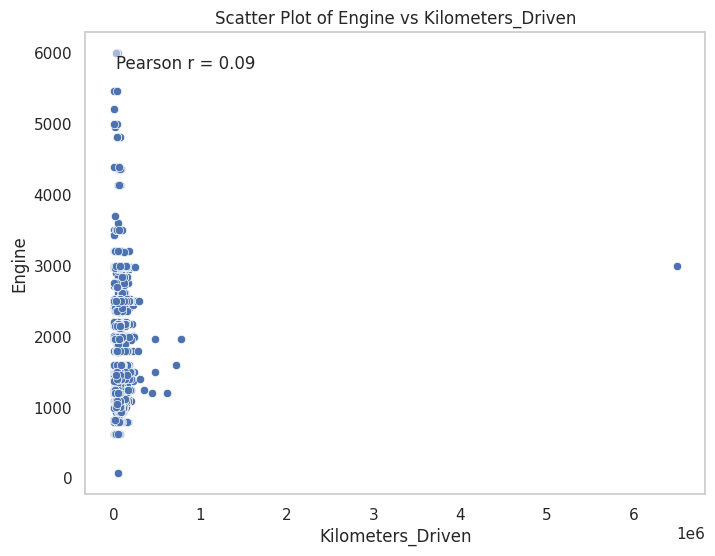

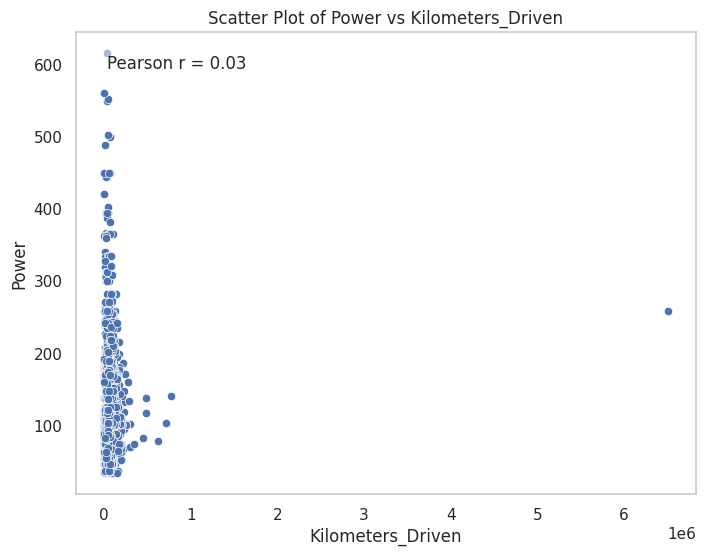

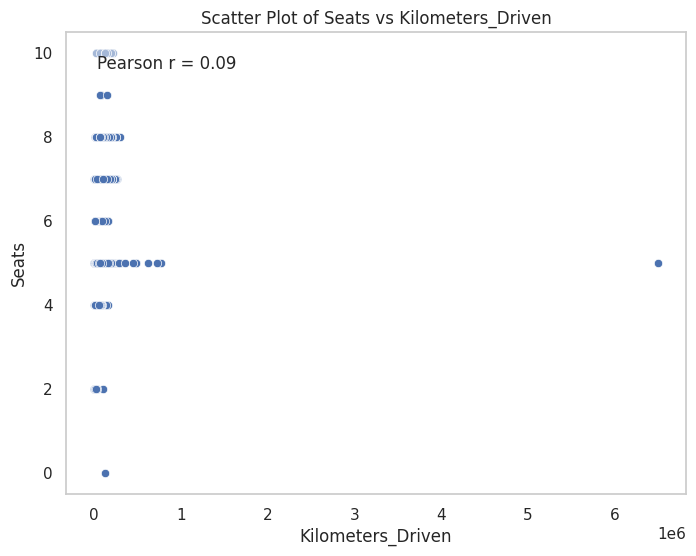

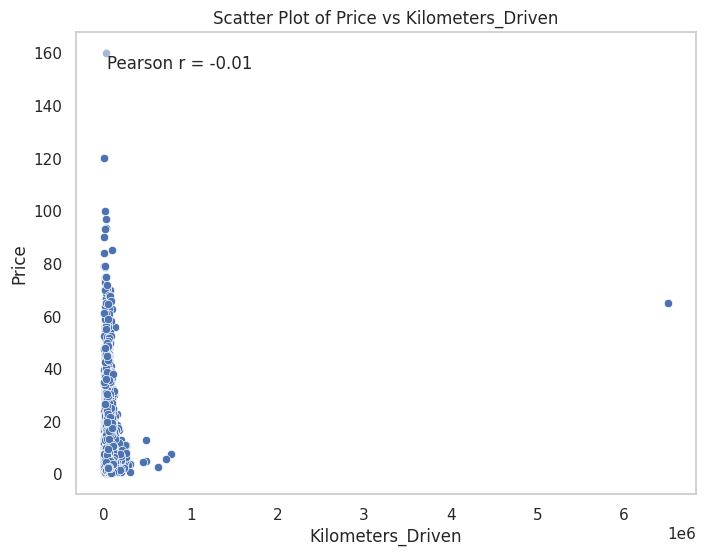

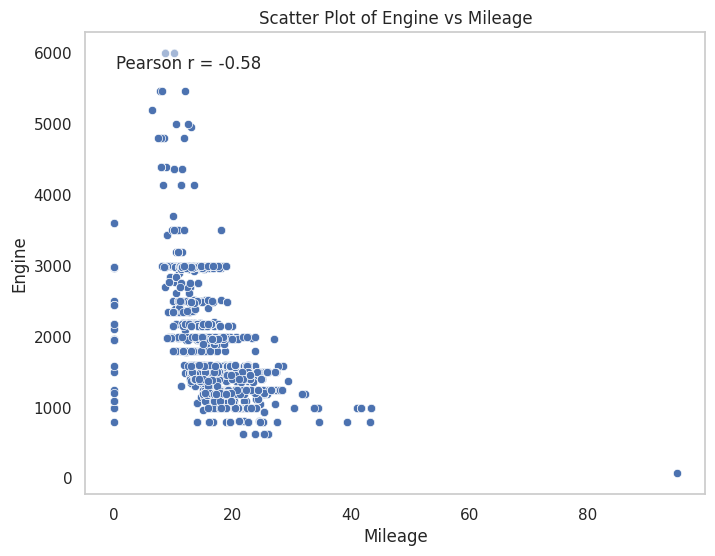

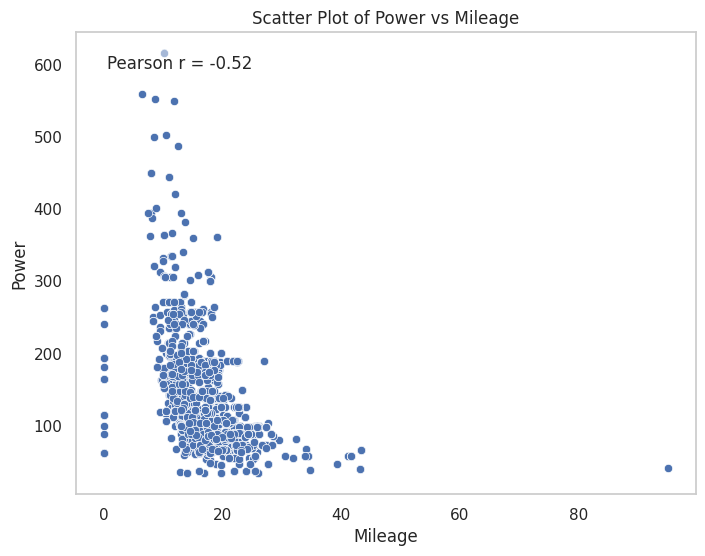

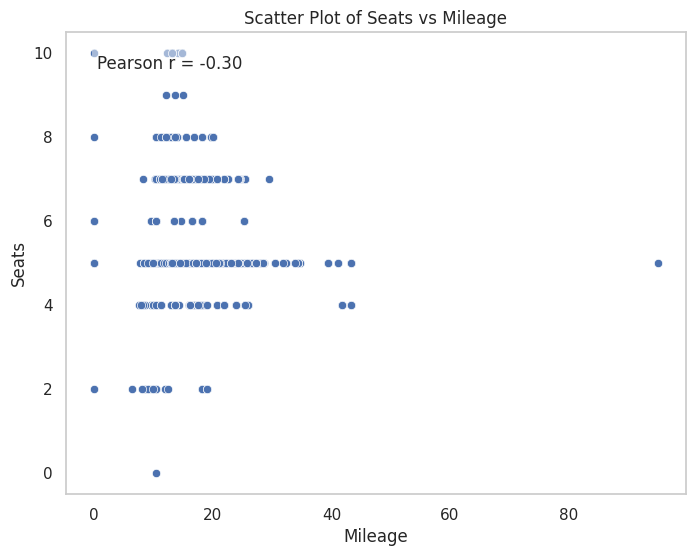

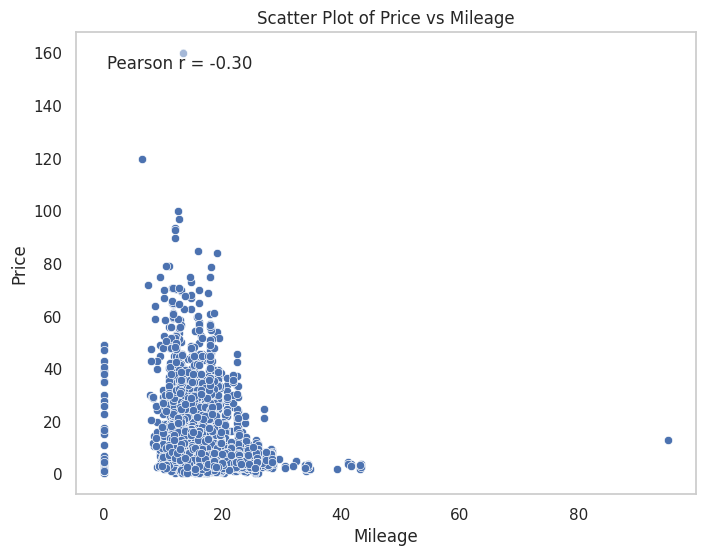

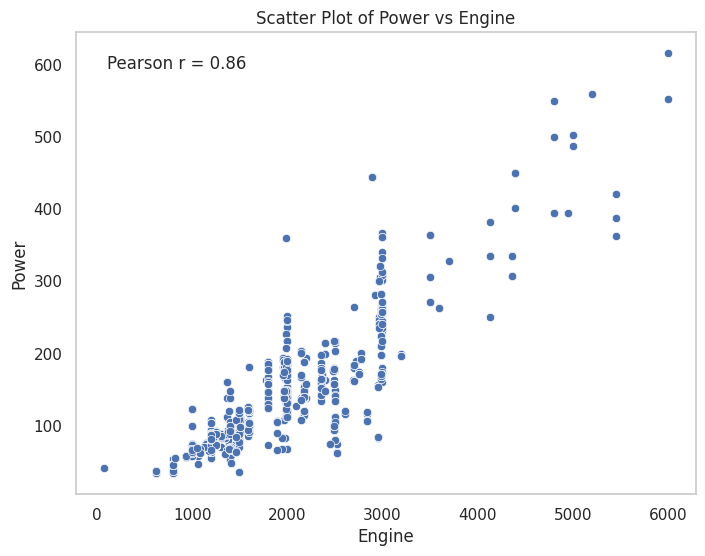

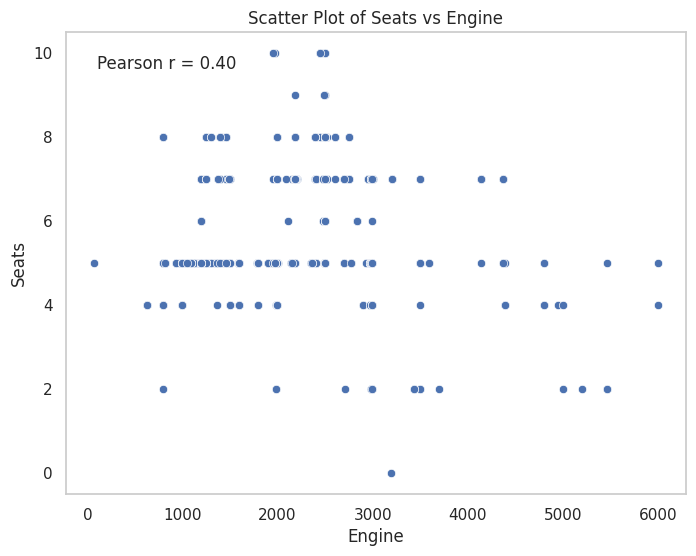

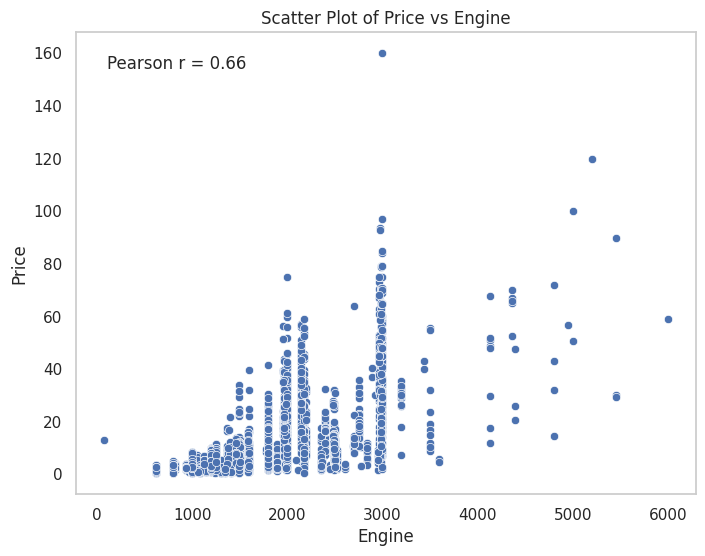

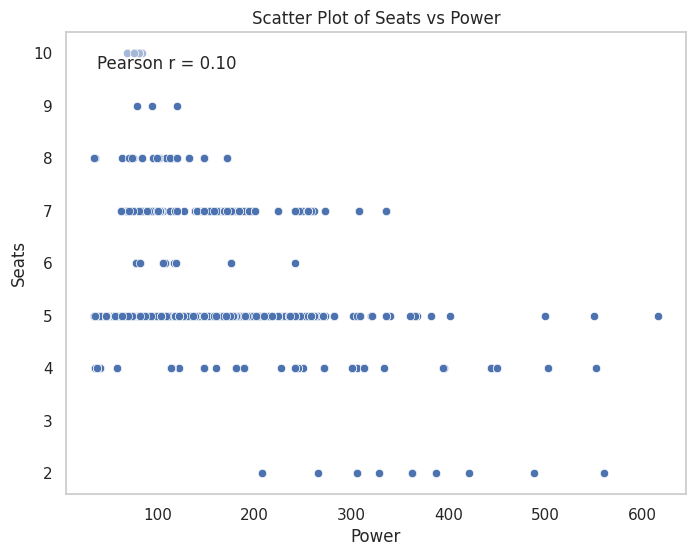

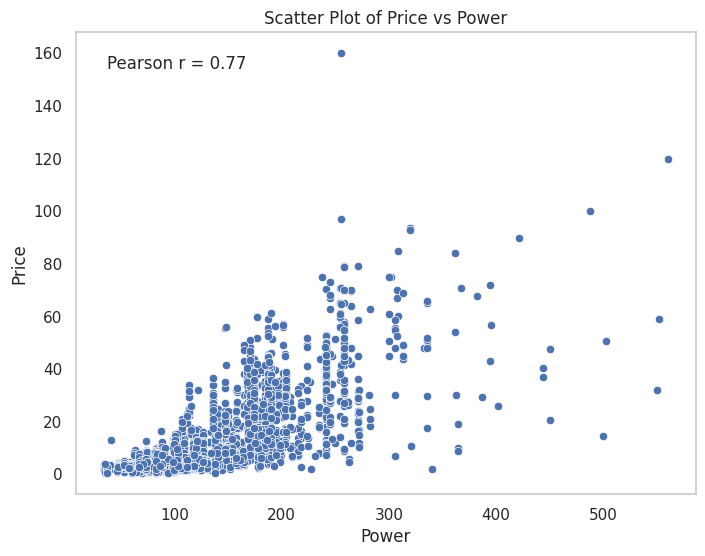

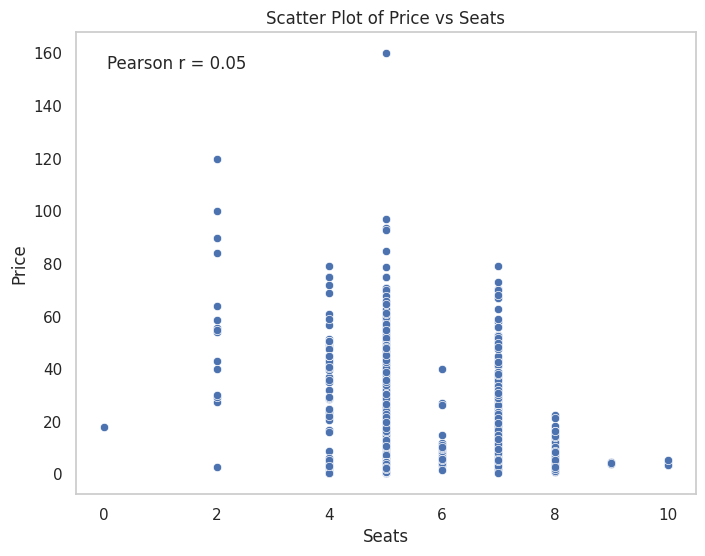

In [30]:
columns = ['Car_Age', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']

# Scatter plots
plt.figure(figsize=(10, 8))
num_columns = len(columns)

for i in range(num_columns):
    for j in range(i + 1, num_columns):
        x_col = columns[i]
        y_col = columns[j]

        # Filter DataFrame to keep only rows where both x_col and y_col are not NaN
        filtered_df = df[[x_col, y_col]].dropna()

        # Calculate Pearson correlation coefficient
        if len(filtered_df) > 1:  # Ensure there are enough data points
            corr_coef, _ = pearsonr(filtered_df[x_col], filtered_df[y_col])

            # Scatter plot
            plt.figure(figsize=(8, 6))
            sns.scatterplot(x=filtered_df[x_col], y=filtered_df[y_col])

            # Correlation coefficient
            plt.title(f'Scatter Plot of {y_col} vs {x_col}')
            plt.xlabel(x_col)
            plt.ylabel(y_col)
            plt.text(0.05, 0.95, f'Pearson r = {corr_coef:.2f}',
                     ha='left', va='top', transform=plt.gca().transAxes,
                     fontsize=12, bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

            plt.grid()
            plt.show()
        else:
            print(f"Not enough data points to calculate correlation for {x_col} and {y_col}.")



**5. Handling missing values**

There are missing values in the following columns: ‘Mileage’, ‘Engine’, ‘Power’, ‘Seats’, ‘Price’.
Please treat the outliers also as missing values.

(1.5 pt) Please count(print) missing values for each column in the columns of ‘Engine’, ‘Power’, and ‘Seats’.
Please impute the missing values based on subclass (subgroups).
Please draw histogram(distribution) for each column and use different color for the imputed missing values.

NOTE:
For categorical or discrete features, use mode. For continuous features, use mean for all samples belonging
to the same subclass.

If imputing using a subclass or multiple subclasses does not impute all the missing values, please impute using
the subclass as much as possible. Then, impute using the global constant for the remaining rows.

In [31]:
df_new= df.copy()

In [32]:
df_new.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,34.3938,998.0,58.16,5.0,1.75,14
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.6700,1582.0,126.20,5.0,12.50,9
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2000,1199.0,88.70,5.0,4.50,13
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.7700,1248.0,88.76,7.0,6.00,12
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2000,1968.0,140.80,5.0,17.74,11


In [33]:
df_new['Brand'] = df_new['Name'].apply(lambda x: x.split()[0]) # Brand name
df_new['Model'] = df_new['Name'].apply(lambda x: ' '.join(x.split()[1:])) # Model Name

In [34]:
df_new.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,34.3938,998.0,58.16,5.0,1.75,14,Maruti,Wagon R LXI CNG
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.6700,1582.0,126.20,5.0,12.50,9,Hyundai,Creta 1.6 CRDi SX Option
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2000,1199.0,88.70,5.0,4.50,13,Honda,Jazz V
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.7700,1248.0,88.76,7.0,6.00,12,Maruti,Ertiga VDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2000,1968.0,140.80,5.0,17.74,11,Audi,A4 New 2.0 TDI Multitronic


In [35]:
# Detect outliers using IQR and replace outliers with NaN
def treat_outliers_as_nan(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with NaN
    df_new[column] = df_new[column].apply(lambda x: np.nan if x < lower_bound or x > upper_bound else x)

columns_to_check = ['Mileage', 'Engine', 'Power', 'Seats', 'Price']
for column in columns_to_check:
    treat_outliers_as_nan(column)

In [36]:
print("Missing values after treating outliers as NaN:")
missing_counts = df_new[['Engine', 'Power', 'Seats']].isnull().sum()
print(missing_counts)

Missing values after treating outliers as NaN:
Engine     111
Power      448
Seats     1206
dtype: int64


In [37]:
#discrete ('Engine', 'Seat') - use the mean
for column in ['Engine', 'Seats']:
    df[column] = df_new.groupby(['Brand', 'Model'])[column].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

# Continuous column ('Power') - use the mean
df_new['Power'] = df_new.groupby(['Brand', 'Model'])['Power'].transform(lambda x: x.fillna(x.mean()))

# Remaining missing values, impute using the global mode (for discrete) or global mean (for continuous)
df_new['Engine'].fillna(df_new['Engine'].mode()[0], inplace=True)
df_new['Seats'].fillna(df_new['Seats'].mode()[0], inplace=True)
df_new['Power'].fillna(df_new['Power'].mean(), inplace=True)

# Dataframe to show the imputed values
print("Data after imputing missing values:")
df_new[['Brand', 'Model', 'Engine', 'Power', 'Seats']]

Data after imputing missing values:


,Brand,Model,Engine,Power,Seats
0,Maruti,Wagon R LXI CNG,998.0,58.16,5.0
1,Hyundai,Creta 1.6 CRDi SX Option,1582.0,126.20,5.0
2,Honda,Jazz V,1199.0,88.70,5.0
3,Maruti,Ertiga VDI,1248.0,88.76,5.0
4,Audi,A4 New 2.0 TDI Multitronic,1968.0,140.80,5.0
...,...,...,...,...,...
7248,Volkswagen,Vento Diesel Trendline,1598.0,103.60,5.0
7249,Volkswagen,Polo GT TSI,1197.0,103.60,5.0
7250,Nissan,Micra Diesel XV,1461.0,63.10,5.0
7251,Volkswagen,Polo GT TSI,1197.0,103.60,5.0


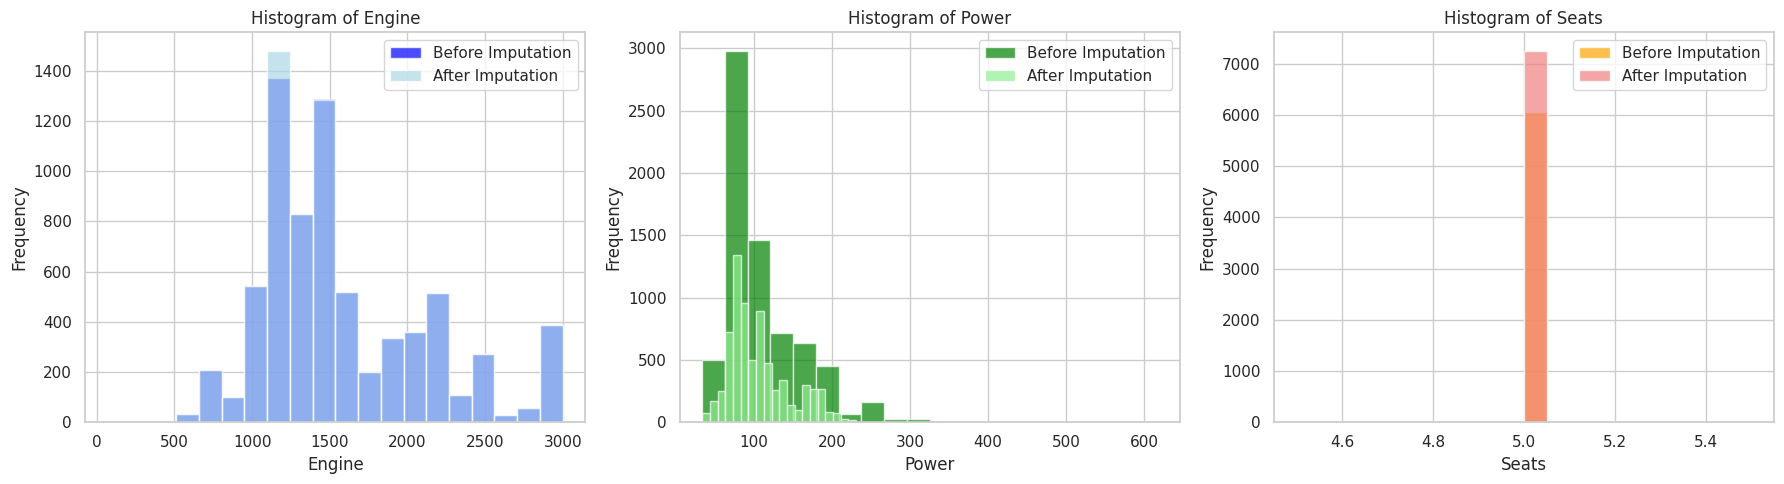

In [38]:
# Before Imputation Histograms
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Define colors
colors_before = ['blue', 'green', 'orange']
colors_after = ['lightblue', 'lightgreen', 'lightcoral']

# Plotting
for i, column in enumerate(['Engine', 'Power', 'Seats']):
    # Before imputation
    axes[i].hist(df[column], bins=20, alpha=0.7, color=colors_before[i], label='Before Imputation')

    # After imputation
    axes[i].hist(df_new[column], bins=20, alpha=0.7, color=colors_after[i], label='After Imputation')

    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

plt.tight_layout()
plt.show()


In [39]:
# Count missing values
missing_counts = df_new[['Mileage', 'Price']].isna().sum()
print("Missing values:")
print(missing_counts)

Missing values:
Mileage     130
Price      1952
dtype: int64


In [40]:
df_new.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,NaN,998.0,58.16,5.0,1.75,14,Maruti,Wagon R LXI CNG
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,9,Hyundai,Creta 1.6 CRDi SX Option
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,13,Honda,Jazz V
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,5.0,6.00,12,Maruti,Ertiga VDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,11,Audi,A4 New 2.0 TDI Multitronic


In [42]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           7253 non-null   object 
 1   Kilometers_Driven  7253 non-null   int64  
 2   Fuel_Type          7253 non-null   object 
 3   Transmission       7253 non-null   object 
 4   Owner_Type         7253 non-null   object 
 5   Mileage            7123 non-null   float64
 6   Engine             7253 non-null   float64
 7   Power              7253 non-null   float64
 8   Seats              7253 non-null   float64
 9   Price              5301 non-null   float64
 10  Car_Age            7253 non-null   int64  
 11  Brand              7253 non-null   object 
dtypes: float64(5), int64(2), object(5)
memory usage: 680.1+ KB


In [41]:
df_new = df_new.drop(columns=['Name', 'Year', 'Model'])


In [43]:
df_encoded = pd.get_dummies(df_new, columns=['Brand', 'Fuel_Type', 'Transmission', 'Owner_Type','Location'], drop_first=True)

# Correlation matrix
correlation_matrix = df_encoded.corr()

In [44]:
# Strong correlations with 'Mileage' and 'Price'
strong_corr_mileage = correlation_matrix['Mileage'].drop('Mileage').abs().sort_values(ascending=False)
strong_corr_price = correlation_matrix['Price'].drop('Price').abs().sort_values(ascending=False)

In [46]:
print("\nStrong correlations with Mileage:")
print(strong_corr_mileage[strong_corr_mileage > 0.3])

print("\nStrong correlations with Price:")
print(strong_corr_price[strong_corr_price > 0.3])



Strong correlations with Mileage:
Engine                 0.612450
Power                  0.510147
Brand_Maruti           0.368527
Transmission_Manual    0.356372
Car_Age                0.304630
Name: Mileage, dtype: float64

Strong correlations with Price:
Power                  0.668082
Engine                 0.599972
Transmission_Manual    0.468171
Fuel_Type_Diesel       0.365114
Car_Age                0.361476
Fuel_Type_Petrol       0.349174
Name: Price, dtype: float64


In [50]:
mileage_predictors = strong_corr_mileage[strong_corr_mileage > 0.3].index.tolist()
price_predictors = strong_corr_price[strong_corr_price > 0.3].index.tolist()

# Drop 'Mileage' and 'Price'
if 'Mileage' in mileage_predictors:
    mileage_predictors.remove('Mileage')
if 'Price' in price_predictors:
    price_predictors.remove('Price')

# Strong correlation features
X_mileage = df_encoded[mileage_predictors]
y_mileage = df_encoded['Mileage']

X_price = df_encoded[price_predictors]
y_price = df_encoded['Price']

# Drop  NaN target for training
X_mileage_train = X_mileage[y_mileage.notna()]
y_mileage_train = y_mileage.dropna()

X_price_train = X_price[y_price.notna()]
y_price_train = y_price.dropna()

# Train models
regressor_mileage = LinearRegression()
regressor_mileage.fit(X_mileage_train, y_mileage_train)

regressor_price = LinearRegression()
regressor_price.fit(X_price_train, y_price_train)

# Predict missing values in Mileage
missing_indices_mileage = df_encoded['Mileage'].isna()
df_encoded.loc[missing_indices_mileage, 'Mileage'] = regressor_mileage.predict(X_mileage[missing_indices_mileage])

# Predict missing values in Price
missing_indices_price = df_encoded['Price'].isna()
df_encoded.loc[missing_indices_price, 'Price'] = regressor_price.predict(X_price[missing_indices_price])


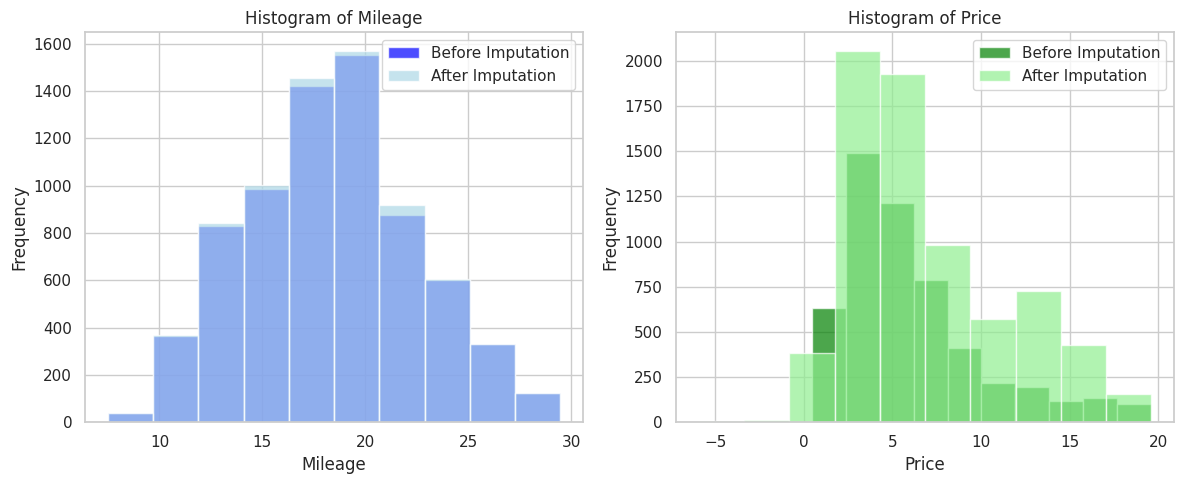

In [52]:
df_new_after = df_encoded.copy()

#Histograms for Mileage and Price
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Before Imputation Histograms
colors_before = ['blue', 'green']
colors_after = ['lightblue', 'lightgreen']

# Mileage Histogram
axes[0].hist(df_new['Mileage'], bins=10, alpha=0.7, color=colors_before[0], label='Before Imputation')
axes[0].hist(df_new_after['Mileage'], bins=10, alpha=0.7, color=colors_after[0], label='After Imputation')
axes[0].set_title('Histogram of Mileage')
axes[0].set_xlabel('Mileage')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Price Histogram
axes[1].hist(df_new['Price'], bins=10, alpha=0.7, color=colors_before[1], label='Before Imputation')
axes[1].hist(df_new_after['Price'], bins=10, alpha=0.7, color=colors_after[1], label='After Imputation')
axes[1].set_title('Histogram of Price')
axes[1].set_xlabel('Price')
axes[1].set_ylabel('Frequency')
axes[1].legend()

plt.tight_layout()
plt.show()